# Kết nối với Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Cài đặt các thư viện cần thiết

In [ ]:
!pip install ultralytics easyocr pytesseract opencv-python matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.

# Tạo file .txt cho các ảnh trong thư mục data

In [ ]:
import cv2

# Thông tin ảnh và bounding box
image_path = '/content/drive/MyDrive/dataset/data/images/ảnh 6.jfif'
label_path = '/content/drive/MyDrive/dataset/data/labels/ảnh 6.txt'

# Đọc kích thước ảnh
img = cv2.imread(image_path)
height, width = img.shape[:2]

# Tọa độ bounding box (pixel)
x_min, y_min, x_max, y_max = 0, 0, width-1, height-1  # ví dụ: bao toàn bộ ảnh

# Chuyển sang định dạng YOLO (chuẩn hóa)
x_center = ((x_min + x_max) / 2) / width
y_center = ((y_min + y_max) / 2) / height
w = (x_max - x_min) / width
h = (y_max - y_min) / height

# Class id
class_id = 0

# Ghi file nhãn
with open(label_path, 'w') as f:
    f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {w:.6f} {h:.6f}\n")

print("Đã tạo file nhãn:", label_path)

Đã tạo file nhãn: /content/drive/MyDrive/dataset/data/labels/ảnh 6.txt


# file data.yaml cho ảnh biển số và biển số gắn trên xe(ảnh thực tế)

In [ ]:
yaml_content = """
train: /content/drive/MyDrive/dataset/train/images
val: /content/drive/MyDrive/dataset/train/images
nc: 1
names: ['bienso1']
"""

with open('/content/drive/MyDrive/dataset/data.yaml', 'w') as f:
    f.write(yaml_content)

# Huấn luyện mô hình yolov8

In [ ]:
!yolo detect train data='/content/drive/MyDrive/dataset/data.yaml' model=yolov8n.pt epochs=100 imgsz=640

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 6.25M/6.25M [00:00<00:00, 76.7MB/s]
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/dataset/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgs

# Kết quả sau khi huấn luyện

Các cột trong file: ['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']


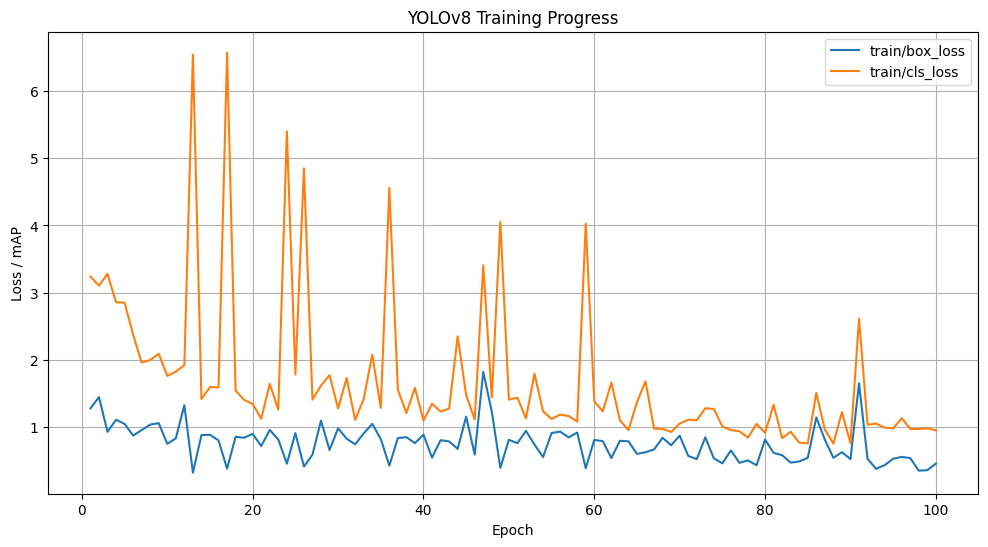

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

results_csv = '/content/runs/detect/train/results.csv'

if os.path.exists(results_csv):
    df = pd.read_csv(results_csv)
    print("Các cột trong file:", df.columns.tolist())  # Xem tên cột thực tế

    plt.figure(figsize=(12, 6))
    plt.plot(df['epoch'], df['train/box_loss'], label='train/box_loss')
    plt.plot(df['epoch'], df['train/cls_loss'], label='train/cls_loss')
    # Sửa tên cột mAP cho đúng với file của bạn
    if 'metrics/mAP_0.5' in df.columns:
        plt.plot(df['epoch'], df['metrics/mAP_0.5'], label='mAP@0.5')
    elif 'metrics/mAP_50-95' in df.columns:
        plt.plot(df['epoch'], df['metrics/mAP_50-95'], label='mAP@0.5:0.95')
    plt.xlabel('Epoch')
    plt.ylabel('Loss / mAP')
    plt.title('YOLOv8 Training Progress')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Không tìm thấy file results.csv, hãy kiểm tra lại đường dẫn.")

Số bounding box phát hiện được: 1
Bounding box: (263, 273), (594, 355)


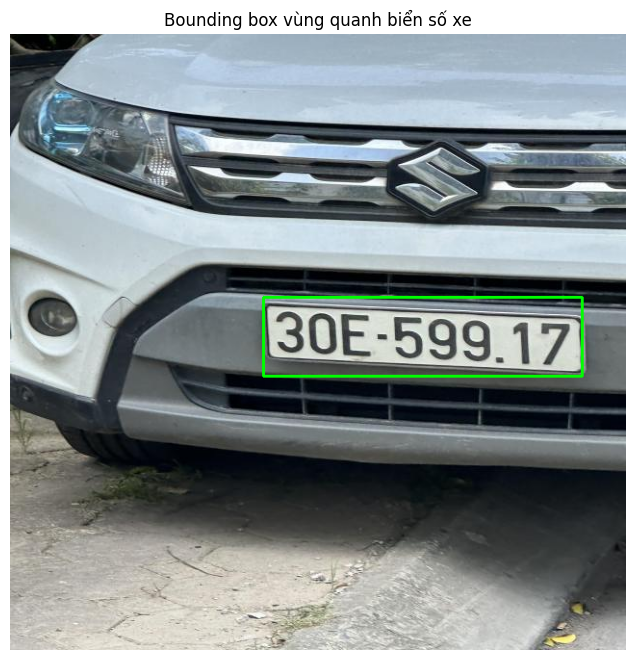

In [ ]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Đường dẫn model và ảnh
model_path = '/content/drive/MyDrive/best.pt'  # Đường dẫn model YOLO đã train
img_path = '/content/drive/MyDrive/dataset/train/images/ảnh 3.jpg'  # Đường dẫn ảnh thực tế

# Load model YOLO đã train
model = YOLO(model_path)

# Đọc ảnh
image = cv2.imread(img_path)

# Dự đoán bounding box vùng biển số
results = model(image, verbose=False)
print("Số bounding box phát hiện được:", len(results[0].boxes))

for box in results[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    # Vẽ bounding box lên ảnh
    cv2.rectangle(image, (x1, y1), (x2, y2), (0,255,0), 2)
    # (Tùy chọn) In ra tọa độ box
    print(f"Bounding box: ({x1}, {y1}), ({x2}, {y2})")

# Hiển thị kết quả cuối cùng
plt.figure(figsize=(10,8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Bounding box vùng quanh biển số xe')
plt.show()

In [ ]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Đường dẫn model và ảnh
model_path = '/content/drive/MyDrive/best.pt'  # Đường dẫn model YOLO đã train
img_path = '/content/drive/MyDrive/dataset/train/images/ảnh 3.jpg'  # Đường dẫn ảnh thực tế

# Load model YOLO đã train
model = YOLO(model_path)

# Đọc ảnh
image = cv2.imread(img_path)

# Dự đoán bounding box vùng biển số
results = model(image, verbose=False)
print("Số bounding box phát hiện được:", len(results[0].boxes))

for box in results[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    # Vẽ bounding box lên ảnh
    cv2.rectangle(image, (x1, y1), (x2, y2), (0,255,0), 2)
    # (Tùy chọn) In ra tọa độ box
    print(f"Bounding box: ({x1}, {y1}), ({x2}, {y2})")

# Hiển thị kết quả cuối cùng
plt.figure(figsize=(10,8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Bounding box vùng quanh biển số xe')
plt.show()

Epoch cuối cùng: 100
Box loss: 0.5756
Class loss: 1.3308


Bounding box 1: (263, 273), (594, 355)


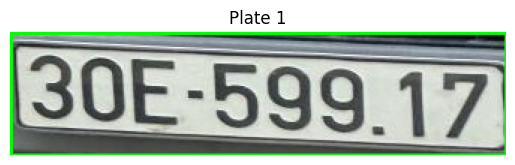

In [ ]:
import matplotlib.pyplot as plt

for idx, box in enumerate(results[0].boxes):
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    print(f"Bounding box {idx+1}: ({x1}, {y1}), ({x2}, {y2})")
    plate_img = image[y1:y2, x1:x2]
    plt.figure()
    plt.imshow(cv2.cvtColor(plate_img, cv2.COLOR_BGR2RGB))
    plt.title(f'Plate {idx+1}')
    plt.axis('off')
    plt.show()

# file best.pt sau khi huấn luyện mô hình


In [ ]:
!cp runs/detect/train/weights/best.pt /content/drive/MyDrive/best.pt

# Đoạn code nhận diện biển số xe qua ảnh thực bằng EasyOCR


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete📦 Số box phát hiện được: 1
⏱️ Thời gian xử lý: 0.88 giây
🔍 Biển số nhận diện: 38P1 54128
❌ Kết quả sai lệch
   So sánh: GT = 29BK02317 | Dự đoán = 38P154128


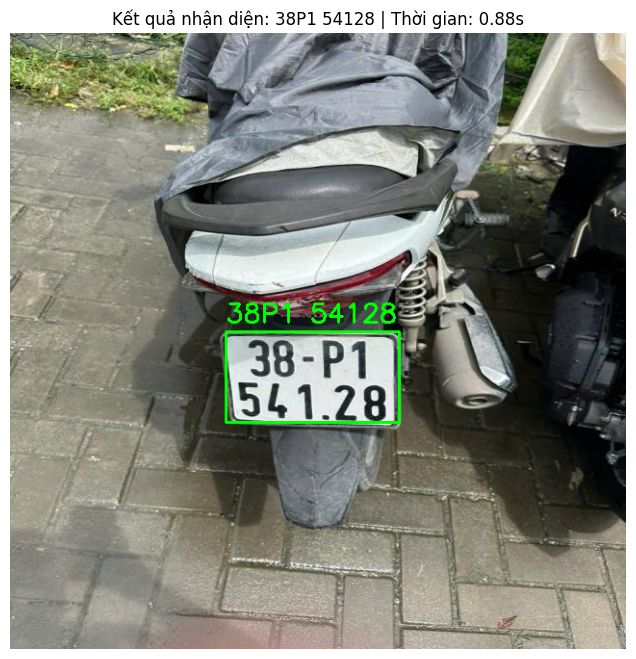

In [ ]:
import cv2
from ultralytics import YOLO
import easyocr
import matplotlib.pyplot as plt
import time
import re

# === CẤU HÌNH ===
model_path = '/content/drive/MyDrive/best.pt'
img_path = '/content/drive/MyDrive/dataset/train/images/ảnh 14.jpg'
ground_truth_plate = "29BK02317"  # <-- Nếu có Ground Truth, bạn sửa tại đây

# === LOAD MODEL & OCR ===
model = YOLO(model_path)
reader = easyocr.Reader(['en', 'vi'], gpu=True)

# === ĐỌC ẢNH VÀ BẮT ĐẦU ĐO THỜI GIAN ===
image = cv2.imread(img_path)
start_time = time.time()

# === PHÁT HIỆN BIỂN SỐ BẰNG YOLO ===
results = model(image, verbose=False)
print("📦 Số box phát hiện được:", len(results[0].boxes))

plate_text = ""
for box in results[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    plate_img = image[y1:y2, x1:x2]
    plate_gray = cv2.cvtColor(plate_img, cv2.COLOR_BGR2GRAY)

    # === OCR ===
    ocr_result = reader.readtext(plate_gray)
    raw_texts = [text for (_, text, conf) in ocr_result if conf > 0.3]
    clean_texts = [re.sub(r'[^\w\s]', '', t).replace(" ", "") for t in raw_texts]
    plate_text = ' '.join(clean_texts)

    # === VẼ OVERLAY KẾT QUẢ ===
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(image, plate_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX,
                0.9, (0, 255, 0), 2)

# === TÍNH THỜI GIAN XỬ LÝ ===
elapsed_time = time.time() - start_time
print(f"⏱️ Thời gian xử lý: {elapsed_time:.2f} giây")
print("🔍 Biển số nhận diện:", plate_text)

# === ĐÁNH GIÁ (NẾU CÓ GROUND TRUTH) ===
if ground_truth_plate:
    predicted = plate_text.replace(" ", "").upper()
    gt = ground_truth_plate.replace(" ", "").upper()
    if predicted == gt:
        print("✅ Kết quả chính xác (trùng ground truth)")
    else:
        print("❌ Kết quả sai lệch")
        print(f"   So sánh: GT = {gt} | Dự đoán = {predicted}")

# === HIỂN THỊ ẢNH KẾT QUẢ ===
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f'Kết quả nhận diện: {plate_text} | Thời gian: {elapsed_time:.2f}s')
plt.show()


# Nhận diện biển số xe qua hình ảnh bằng Tesseract

📦 Số box phát hiện được: 1
🔍 Biển số nhận diện: 30E-59917
⏱️ Thời gian xử lý: 0.84 giây
❌ Sai lệch | GT: 30E-599.17 | Dự đoán: 30E-59917


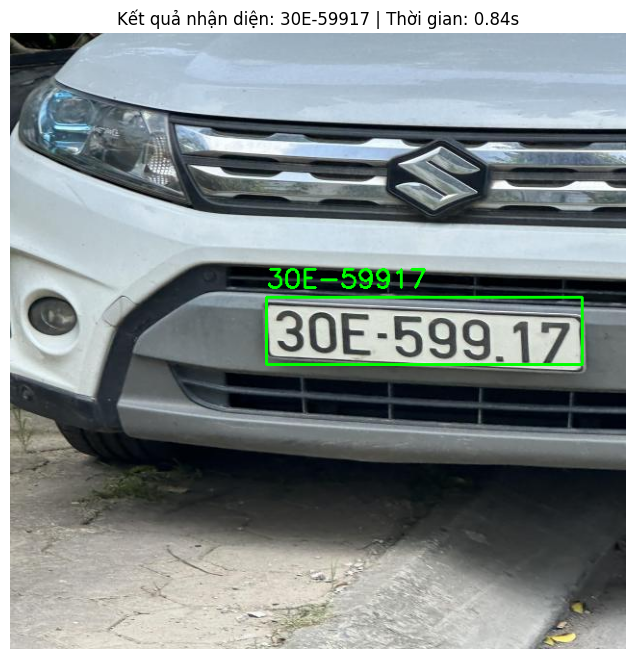

In [ ]:
import cv2
from ultralytics import YOLO
import pytesseract
import matplotlib.pyplot as plt
import time
import re

# === Cấu hình ===
model_path = '/content/drive/MyDrive/best.pt'
img_path = '/content/drive/MyDrive/dataset/train/images/ảnh 3.jpg'
ground_truth_plate = "30E-599.17"  # ← Nếu có ground truth, ghi tại đây

# === Load model YOLO ===
model = YOLO(model_path)

# === Đọc ảnh và bắt đầu đếm thời gian ===
image = cv2.imread(img_path)
start_time = time.time()

# === Nhận diện biển số bằng YOLO ===
results = model(image, verbose=False)
print("📦 Số box phát hiện được:", len(results[0].boxes))

for box in results[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    plate_img = image[y1:y2, x1:x2]

    # === Tiền xử lý cho Tesseract ===
    plate_gray = cv2.cvtColor(plate_img, cv2.COLOR_BGR2GRAY)
    plate_gray = cv2.bilateralFilter(plate_gray, 11, 17, 17)
    _, plate_thresh = cv2.threshold(plate_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # === OCR với Tesseract ===
    config = '--psm 7 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789-'
    plate_text = pytesseract.image_to_string(plate_thresh, config=config)
    plate_text = plate_text.strip().replace('\n', '').replace(' ', '')
    plate_text = re.sub(r'[^\w\-]', '', plate_text).upper()

    print("🔍 Biển số nhận diện:", plate_text)

    # === Vẽ box lên ảnh gốc ===
    cv2.rectangle(image, (x1, y1), (x2, y2), (0,255,0), 2)
    cv2.putText(image, plate_text, (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)

# === Đánh giá (nếu có ground truth) ===
elapsed_time = time.time() - start_time
print(f"⏱️ Thời gian xử lý: {elapsed_time:.2f} giây")

if ground_truth_plate:
    pred = plate_text.strip().upper()
    gt = ground_truth_plate.strip().upper()
    if pred == gt:
        print("✅ Trùng ground truth")
    else:
        print(f"❌ Sai lệch | GT: {gt} | Dự đoán: {pred}")

# === Hiển thị ảnh kết quả ===
plt.figure(figsize=(10,8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f"Kết quả nhận diện: {plate_text} | Thời gian: {elapsed_time:.2f}s")
plt.show()


# Nhận diện biển số xe thông qua video bằng EasyOCR


🚦 Bắt đầu nhận diện video...

🟩 Frame 5: Biển số mới nhận diện: 38557
🟩 Frame 10: Biển số mới nhận diện: 33557
🟩 Frame 15: Biển số mới nhận diện: 03557
🟩 Frame 15: Biển số mới nhận diện: 4 100
🟩 Frame 20: Biển số mới nhận diện: 293F9
🟩 Frame 20: Biển số mới nhận diện: 9FH8
🟩 Frame 25: Biển số mới nhận diện: 3353
🟩 Frame 40: Biển số mới nhận diện: 29 33
🟩 Frame 50: Biển số mới nhận diện: 299FI
🟩 Frame 60: Biển số mới nhận diện: 29-F1


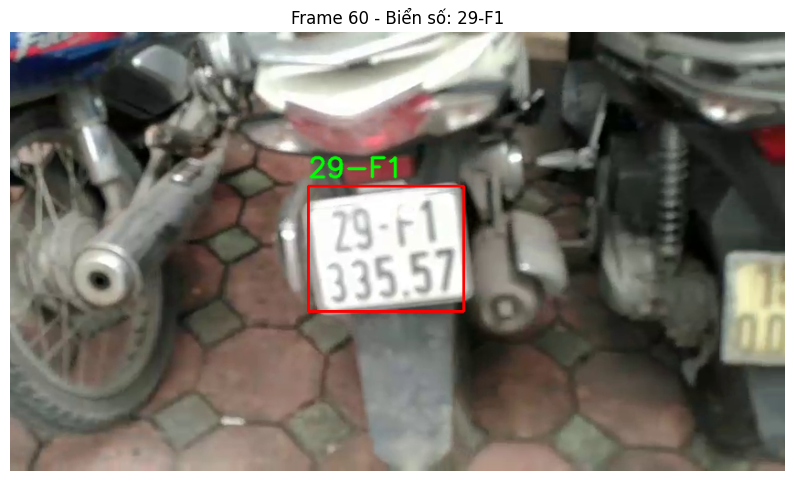

🟩 Frame 65: Biển số mới nhận diện: 33557 29-FI
🟩 Frame 70: Biển số mới nhận diện: 35557 29-F1
🟩 Frame 75: Biển số mới nhận diện: 00253
🟩 Frame 75: Biển số mới nhận diện: 29-FJ 33552
🟩 Frame 80: Biển số mới nhận diện: 29-FI 83557
🟩 Frame 80: Biển số mới nhận diện: 59 00353
🟩 Frame 130: Biển số mới nhận diện: 79 499
🟩 Frame 135: Biển số mới nhận diện: 5969
🟩 Frame 140: Biển số mới nhận diện: 2942
🟩 Frame 145: Biển số mới nhận diện: 29502 99459
🟩 Frame 150: Biển số mới nhận diện: L9989


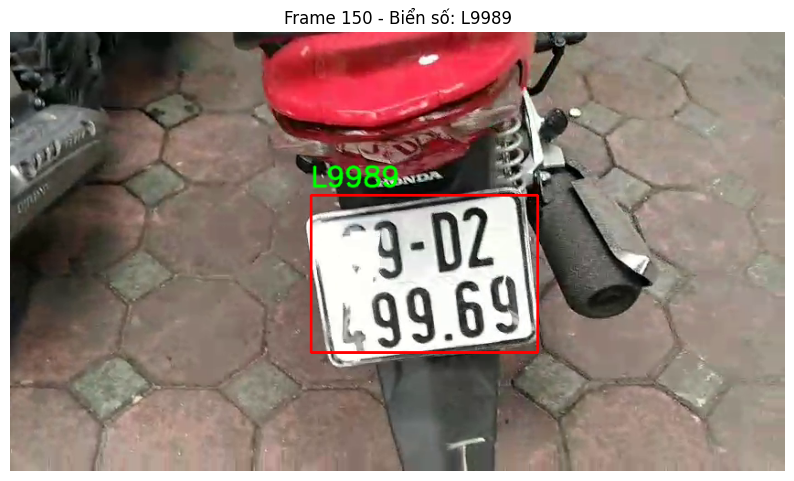

🟩 Frame 160: Biển số mới nhận diện: 69569
🟩 Frame 165: Biển số mới nhận diện: 499
🟩 Frame 235: Biển số mới nhận diện: 29

💾 Đã lưu kết quả vào: /content/drive/MyDrive/dataset/train/video/results.csv
🎬 Đã lưu video kết quả tại: /content/drive/MyDrive/dataset/train/video/output_detect.mp4


In [ ]:
import cv2
import numpy as np
import easyocr
from ultralytics import YOLO
import matplotlib.pyplot as plt
import os
import re
import pandas as pd

# ====== Cấu hình đường dẫn ======
video_path = '/content/drive/MyDrive/dataset/train/video/test_6.mp4'
model_path = '/content/drive/MyDrive/best.pt'
output_video_path = '/content/drive/MyDrive/dataset/train/video/output_detect.mp4'
output_csv_path = '/content/drive/MyDrive/dataset/train/video/results.csv'

# ====== Hàm tiền xử lý vùng biển số ======
def preprocess_plate_image(plate_img):
    if plate_img is None or plate_img.size == 0:
        return None
    gray = cv2.cvtColor(plate_img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced = clahe.apply(blurred)
    thresh = cv2.adaptiveThreshold(enhanced, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    return thresh

def clean_plate_text(text):
    cleaned = re.sub(r'[^\w\s-]', '', text)
    cleaned = cleaned.replace('_', '').replace(' ', '')
    return cleaned.upper()

# ====== Khởi tạo model và OCR ======
assert os.path.exists(model_path), f"❌ Không tìm thấy model: {model_path}"
model = YOLO(model_path)
reader = easyocr.Reader(['en', 'vi'], gpu=True)

# ====== Đọc video đầu vào và thiết lập ghi video kết quả ======
assert os.path.exists(video_path), f"❌ Không tìm thấy file video: {video_path}"
cap = cv2.VideoCapture(video_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
if fps == 0:
    fps = 20.0
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

frame_id = 0
results_list = []
unique_plates = set()  # Để lọc biển số trùng lặp

print('\n🚦 Bắt đầu nhận diện video...\n')
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    frame_id += 1

    # Tối ưu: chỉ xử lý mỗi 5 frame
    if frame_id % 5 != 0:
        out.write(frame)
        continue

    results = model(frame, verbose=False)
    found_plates = []
    for box in results[0].boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        plate_img = frame[y1:y2, x1:x2]
        preprocessed = preprocess_plate_image(plate_img)
        ocr_result = reader.readtext(preprocessed)
        plate_texts = [clean_plate_text(text) for (_, text, conf) in ocr_result if conf > 0.3]
        plate_texts = [t for t in plate_texts if t]
        if not plate_texts:
            continue
        plate_text = ' '.join(plate_texts)
        # Lọc biển số trùng lặp giữa các frame
        if plate_text not in unique_plates:
            unique_plates.add(plate_text)
            results_list.append({'Frame': frame_id, 'Plate': plate_text, 'Box': f'({x1},{y1},{x2},{y2})'})
            print(f"🟩 Frame {frame_id}: Biển số mới nhận diện: {plate_text}")
        found_plates.append(plate_text)
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0,0,255), 2)
        cv2.putText(frame, plate_text, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2, cv2.LINE_AA)

    out.write(frame)

    if found_plates and frame_id % 30 == 0:
        plt.figure(figsize=(10,8))
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f'Frame {frame_id} - Biển số: {", ".join(found_plates)}')
        plt.show()

cap.release()
out.release()

# ====== Lưu kết quả ra file CSV (Excel) ======
df = pd.DataFrame(results_list)
df.to_csv(output_csv_path, index=False)
print(f"\n💾 Đã lưu kết quả vào: {output_csv_path}")
print(f"🎬 Đã lưu video kết quả tại: {output_video_path}")

# Nhận diện biển số xe qua video bằng YOLOv8 kết hợp với Tesseract


In [ ]:
import cv2
from ultralytics import YOLO
import pytesseract

video_path = '/content/drive/MyDrive/dataset/train/video/test_6.mp4'
model_path = '/content/drive/MyDrive/best.pt'
output_video_path = '/content/drive/MyDrive/dataset/train/video/output_detect_tesseract.mp4'

model = YOLO(model_path)
cap = cv2.VideoCapture(video_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
if fps == 0:
    fps = 20.0
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

frame_id = 0
print('\n🚦 Bắt đầu nhận diện video với Tesseract...\n')
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    frame_id += 1

    # Chỉ xử lý mỗi 5 frame để tăng tốc
    if frame_id % 5 != 0:
        out.write(frame)
        continue

    results = model(frame, verbose=False)
    found_plates = []
    for box in results[0].boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        plate_img = frame[y1:y2, x1:x2]
        plate_gray = cv2.cvtColor(plate_img, cv2.COLOR_BGR2GRAY)
        plate_gray = cv2.bilateralFilter(plate_gray, 11, 17, 17)
        _, plate_thresh = cv2.threshold(plate_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        config = '--psm 7 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789-'
        plate_text = pytesseract.image_to_string(plate_thresh, config=config)
        plate_text = plate_text.strip().replace('\n', ' ')
        if plate_text:
            found_plates.append(plate_text)
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0,0,255), 2)
            cv2.putText(frame, plate_text, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2, cv2.LINE_AA)
            print(f"🟩 Frame {frame_id}: Biển số: {plate_text}")

    out.write(frame)

cap.release()
out.release()
print(f"\n🎬 Đã lưu video kết quả tại: {output_video_path}")


🚦 Bắt đầu nhận diện video với Tesseract...

🟩 Frame 10: Biển số: B
🟩 Frame 45: Biển số: FL
🟩 Frame 50: Biển số: B
🟩 Frame 60: Biển số: 3
🟩 Frame 80: Biển số: S
🟩 Frame 95: Biển số: S
🟩 Frame 235: Biển số: TN

🎬 Đã lưu video kết quả tại: /content/drive/MyDrive/dataset/train/video/output_detect_tesseract.mp4
